In [2]:
import pandas as pd
df = pd.read_csv("/content/housing.csv")

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
4995,-118.30,33.99,47,2637,588.0,1903,521,1.8317,96500,<1H OCEAN
4996,-118.30,33.99,47,2212,533.0,1903,554,1.9853,101100,<1H OCEAN
4997,-118.28,33.99,46,2577,703.0,2446,687,1.2750,98300,<1H OCEAN
4998,-118.29,33.99,46,2198,530.0,2067,497,2.0542,103400,<1H OCEAN


Compute the correlation coefficient between 'median_income' and 'median_house_value' columns.

In [3]:
co_rel = df['median_income'].corr(df['median_house_value'])
co_rel

0.6747425007394726

Extract rows where 'housing_median_age' is greater than 40 and 'median_income' is less than 4.

In [4]:
m_age_g_10 = df['housing_median_age'] > 40
df[m_age_g_10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
4995,-118.30,33.99,47,2637,588.0,1903,521,1.8317,96500,<1H OCEAN
4996,-118.30,33.99,47,2212,533.0,1903,554,1.9853,101100,<1H OCEAN
4997,-118.28,33.99,46,2577,703.0,2446,687,1.2750,98300,<1H OCEAN
4998,-118.29,33.99,46,2198,530.0,2067,497,2.0542,103400,<1H OCEAN


Identify and remove outliers in the 'median_house_value' column using the IQR method.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
4995,-118.30,33.99,47,2637,588.0,1903,521,1.8317,96500,<1H OCEAN
4996,-118.30,33.99,47,2212,533.0,1903,554,1.9853,101100,<1H OCEAN
4997,-118.28,33.99,46,2577,703.0,2446,687,1.2750,98300,<1H OCEAN
4998,-118.29,33.99,46,2198,530.0,2067,497,2.0542,103400,<1H OCEAN


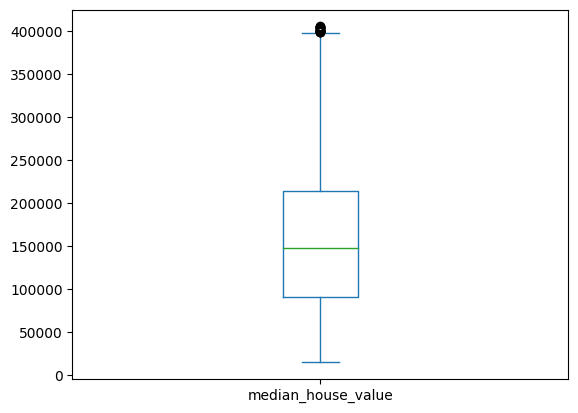

In [9]:
df['median_house_value'].plot(kind = 'box')
q1 = df.describe()['median_house_value']['25%']
q3 = df.describe()['median_house_value']['75%']

IQR = q3-q1

u_limit = q3 + (1.5*IQR)
l_limit = q1 - (1.5*IQR)

df = df[(df['median_house_value'] < u_limit) & (df['median_house_value'] > l_limit)]
df

Implement a class named DataVisualizer with a method to plot a histogram of 'median_house_value'.
Create an object for the class and call the method to show histogram in the output.

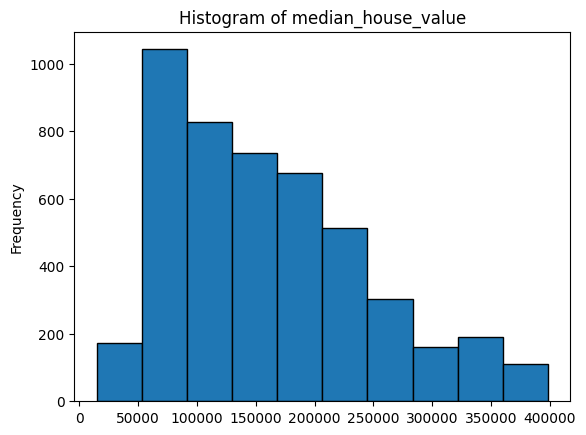

In [10]:
import matplotlib.pyplot as plt

class DataVisualizer:
  def __init__(self, DataFrame):
    self.DataFrame = DataFrame
  def histogram(self, column_name):
    self.DataFrame[column_name].plot(kind = 'hist', edgecolor = 'black')
    plt.title(f"Histogram of {column_name}")
    plt.show()

visualizer = DataVisualizer(df)

visualizer.histogram('median_house_value')

Create a scatter plot of 'median_income' against 'median_house_value'.

In [11]:
import plotly.express as px

fig = px.scatter(df, x='median_income', y='median_house_value',
                 title='Scatter Plot of Median Income vs. Median House Value')

fig.show()